Решение задачи 2 по физико-химической гидрогеодинамике с помощью численного расчета преобразования Лапласа-Карсона

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats

In [22]:
bound = 0.1# g/l
x = 1.2 #meters
num_data_points = 15 # number of data points including initial conditions
#time = [0,1,2,3,4,5,6,8,9,10,11,12,13,14, 15]
list1 = [12, 11.214,9.939,8.386,6.781,5.287,3.997,2.945,2.125,1.509,1.061,0.744,0.524,0.375, 0.276]
#data = np.array(list)
# Create DataFrame 
df = pd.DataFrame({'TimeDays': np.linspace(0,num_data_points-1,num_data_points), 'C, g/l':list1}) 
for i in range(15,1000):
#    print(i)
    df.loc[i] = [i,bound]
df['c^'] = (df['C, g/l']-df['C, g/l'].max())/(bound-df['C, g/l'].max())
# Print the output. 
df 


,TimeDays,"C, g/l",c^
0,0.0,12.000,-0.000000
1,1.0,11.214,0.066050
2,2.0,9.939,0.173193
3,3.0,8.386,0.303697
4,4.0,6.781,0.438571
...,...,...,...
995,995.0,0.100,1.000000
996,996.0,0.100,1.000000
997,997.0,0.100,1.000000
998,998.0,0.100,1.000000


Text(0, 0.5, 'Концентрация, [-]')

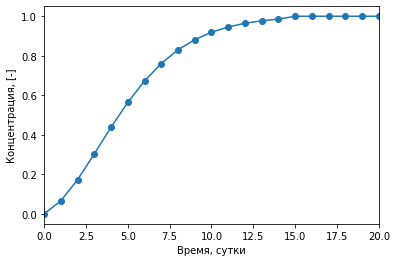

In [23]:
fig, ax= plt.subplots()
ax.plot(df['TimeDays'],df['c^'], 'o-')
ax.set_xlabel('Время, сутки')
ax.set_xlim(0,20)
ax.set_ylabel('Концентрация, [-]')

In [25]:
s = 8# number of p
power = 1/(s-1)
q = pow(((14/20)*(5/14)), power)
q = round(q,2)
t_C_max = 16# time of max concentration
tmax = t_C_max/5
tmax = round(tmax,2)

t = [tmax  *q**i for i in range(s)]
t_rounded = [round(num, 1) for num in t]
p = [1/i for i in t]
p
#p = [0.5,0.55,0.6,0.8]
#p = [1/7,0.2,0.3,0.8]
#for x in p:
#    print(x)
#p = [0.357,0.556,1,1.429] 

[0.3125,
 0.38109756097560976,
 0.46475312314098755,
 0.5667721013914483,
 0.6911854895017662,
 0.8429091335387393,
 1.0279379677301699,
 1.2535828874758173]

In [26]:
tmax

3.2

exponent = 0      -0.000000e+00
1       4.832352e-02
2       9.270368e-02
3       1.189296e-01
4       1.256528e-01
           ...      
995    9.152917e-136
996    6.696417e-136
997    4.899204e-136
998    3.584334e-136
999    2.622355e-136
Name: laplace, Length: 1000, dtype: float64
p = 0.3125 int = 0.30325722854608544
exponent = 0      -0.000000e+00
1       4.511978e-02
2       8.081908e-02
3       9.680894e-02
4       9.550059e-02
           ...      
995    2.084371e-165
996    1.423857e-165
997    9.726529e-166
998    6.644302e-166
999    4.538797e-166
Name: laplace, Length: 1000, dtype: float64
p = 0.38109756097560976 int = 0.25069996696304153
exponent = 0      -0.000000e+00
1       4.149883e-02
2       6.836780e-02
3       7.532203e-02
4       6.834102e-02
           ...      
995    1.477344e-201
996    9.282010e-202
997    5.831796e-202
998    3.664060e-202
999    2.302093e-202
Name: laplace, Length: 1000, dtype: float64
p = 0.46475312314098755 int = 0.20338059795312033
expon

[0, 20, 0, 0.1]

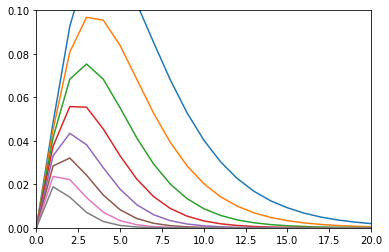

In [27]:
integrated = []
for count in p:
    exp_ = np.exp((-count)*df['TimeDays'])
    df['laplace'] = df['c^']*exp_
    print('exponent = ' + str(df['laplace']))
    plt.plot(df['laplace'])
    
    #df
    #s = df.apply(lambda g: integrate.trapz(df['laplace'], x=df['TimeDays']))
    s = integrate.trapz(df['laplace'], x=df['TimeDays'])
#    s = integrate.simps(df['laplace'], x=df['TimeDays'], even='avg')
    s = s*count
    integrated.append(s)
    print('p = ' +str(count) +' int = '+ str(s))
integrated
plt.axis([0, 20, 0, 0.1])

In [28]:
df_final = pd.DataFrame({'p, days^-1':p, 'U^':integrated}) 
df_final

,"p, days^-1",U^
0,0.312500,0.303257
1,0.381098,0.250700
2,0.464753,0.203381
3,0.566772,0.162063
4,0.691185,0.127008
5,0.842909,0.098020
6,1.027938,0.074552
7,1.253583,0.055852


In [29]:
df_final['a,m-1'] = -1/1.2*np.log(df_final['U^'])
df_final['p/a'] =df_final['p, days^-1']/df_final['a,m-1'] 
df_final

,"p, days^-1",U^,"a,m-1",p/a
0,0.312500,0.303257,0.994312,0.314288
1,0.381098,0.250700,1.152915,0.330551
2,0.464753,0.203381,1.327230,0.350168
3,0.566772,0.162063,1.516476,0.373743
4,0.691185,0.127008,1.719586,0.401949
5,0.842909,0.098020,1.935488,0.435502
6,1.027938,0.074552,2.163554,0.475116
7,1.253583,0.055852,2.404210,0.521411


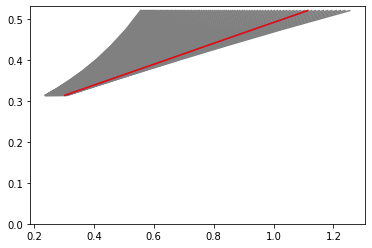

In [30]:
r2 = []
listofslopes = []
listofintercepts = []
fig, ax1= plt.subplots()
A3 = np.linspace(0,1,101)
df_results = pd.DataFrame({'A3': A3 , 'R2':''}) 
for count1 in A3:
    df_final['result'] = (df_final['p, days^-1'].round(3)/(1+count1*df_final['p, days^-1'].round(3))).round(3)
    df_final['result'] = df_final['result'].round(3)
    ax1.plot(df_final['result'].round(3),df_final['p/a'], '-', color = 'gray')
    slope, intercept, r_value, _, _ = stats.linregress(df_final['result'].round(3),df_final['p/a'])
    r2.append(r_value**2)
    listofintercepts.append(intercept)
    listofslopes.append(slope)
df_results['R2'] = r2
df_results['slope'] = listofslopes
df_results['intercept'] = listofintercepts
df_results
slope1 = df_results['slope'].loc[df_results['R2'].idxmax()]
intercept1 = df_results['intercept'].loc[df_results['R2'].idxmax()]
ax1.plot((df_final['p/a']-intercept1)/slope1,df_final['p/a'])
#intercepty = slope1*0+intercept1
ax1.set_ylim(bottom = 0)
A3_res = df_results['A3'].loc[df_results['R2'].idxmax()]
df_final['result'] = df_final['p, days^-1']/(1+A3_res*df_final['p, days^-1'])
df_final['result'] = df_final['result'].round(3)
ax1.plot(df_final['result'].round(3),df_final['p/a'], '-', color = 'red')

In [31]:
df_results.loc[df_results['R2'].idxmax()]

A3           0.100000
R2           0.999996
slope        0.255668
intercept    0.236713
Name: 10, dtype: float64

In [32]:
df_final['result'] = df_final['p, days^-1'].round(3)/(1+0.2*df_final['p, days^-1'].round(3))
#df_final['result'] = df_final['result'].round(3)
#slope, intercept, r_value, _, _ = stats.linregress(df_final['result'].round(3),df_final['p/a'].round(3))
df_final['result']
#A3_res = 0.05
#r_value**2

0    0.293675
1    0.354023
2    0.425435
3    0.509251
4    0.607099
5    0.721376
6    0.852687
7    1.002558
Name: result, dtype: float64

In [33]:
v = 0.1
n = v/intercept1
k = intercept1*A3_res/(slope1+A3_res)
alpha = k*(1-k)*n/A3_res
print('n = '+ str(n))
print('k = ' +str(k))
print('alpha = '+str(alpha))

n = 0.42245190327675813
k = 0.06655454732001513
alpha = 0.2624484119948199


In [401]:
round(0.342334, 2)

0.34

In [39]:
pd.set_option('display.max_rows', 10)
df_results


,A3,R2,slope,intercept
0,0.00,0.999383,0.220571,0.247568
1,0.01,0.999519,0.224081,0.246397
2,0.02,0.999638,0.227535,0.245304
3,0.03,0.999699,0.230904,0.244250
4,0.04,0.999792,0.234365,0.243229
...,...,...,...,...
96,0.96,0.984608,0.621399,0.153801
97,0.97,0.984298,0.625882,0.152883
98,0.98,0.984214,0.630182,0.152364
99,0.99,0.983463,0.636526,0.150982


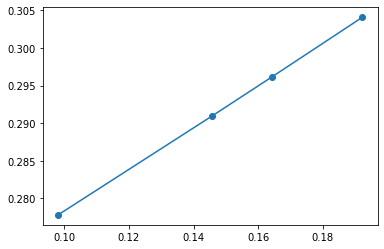

In [333]:
plt.plot(df_final['result'],df_final['p/a'],'o-')

In [182]:
pd.set_option('display.max_rows', 10)
df_results

,A3,R2,slope,intercept
0,0.00,0.998985,0.229330,0.264623
1,0.01,0.999140,0.233496,0.263126
2,0.02,0.999317,0.237645,0.261775
3,0.03,0.999466,0.241834,0.260282
4,0.04,0.999576,0.245938,0.258862
...,...,...,...,...
96,0.96,0.985923,0.727800,0.139453
97,0.97,0.985862,0.731430,0.139336
98,0.98,0.985415,0.738434,0.137963
99,0.99,0.985373,0.744908,0.136290


In [206]:
v = 0.1
n = v/intercept1
k = intercept1*A3_res/(slope1+A3_res)
alpha = k*(1-k)*n/A3_res
print('n = '+ str(n))
print('k = ' +str(k))
print('alpha = '+str(alpha))

n = 0.401058254853647
k = 0.06667859929491535
alpha = 0.24958883388974262


In [332]:
0.0868526565612364*(1-0.0868526565612364)*0.4485852957692019/A3_res

0.1111780422211543

In [205]:
df_final['p/a'] = [0.344,0.398,0.513,]

In [206]:
df_final['p/a']

0    0.344
1    0.398
2    0.513
3    0.622
Name: p/a, dtype: float64

In [ ]:
n = 0.4036690021448831
k = 0.07427333511390906
alpha = 0.23129159661357615